## **Ensemble Learning**

### **Theoretical**

### **1. Can we use Bagging for regression problems?**
Yes, Bagging can be used for regression problems. Bagging (Bootstrap Aggregating) is a general-purpose ensemble method that can be applied to both classification and regression. In the regression context, it involves training multiple regressors (e.g., Decision Trees) on different bootstrapped subsets of the training data. The final prediction is obtained by averaging the outputs of all base regressors. This method helps in reducing variance, leading to more robust and stable predictions without significantly increasing bias.

### **2. What is the difference between multiple model training and single model training?**
Single model training involves creating one predictive model from the entire dataset. While this can be simple and efficient, the model may underfit or overfit depending on its complexity.

Multiple model training refers to training several models either independently (like in Bagging) or sequentially (like in Boosting). These models are then combined to make a final prediction. This often results in better generalization, reduced overfitting, and higher accuracy due to the aggregation of diverse model perspectives.

### **3. Explain the concept of feature randomness in Random Forest?**
Random Forest introduces feature randomness by selecting a random subset of features at each split when building a tree. This process is called "feature bagging." Instead of using the best split among all features, it chooses the best among a random subset. This ensures the individual trees in the forest are diverse and less correlated, improving overall model performance and generalization while reducing overfitting.

### **4. What is OOB (Out-of-Bag) Score?**
The Out-of-Bag (OOB) Score is an internal validation method used in ensemble techniques like Bagging and Random Forest. Each base model is trained on a bootstrap sample, leaving out approximately one-third of the data. These left-out samples (OOB samples) are used to test the model’s performance. The OOB score gives an unbiased estimate of model accuracy without requiring a separate validation set.

### **5. How can you measure the importance of features in a Random Forest model?**
Random Forest models measure feature importance in two common ways:
1. Mean Decrease in Impurity (Gini Importance): Measures how much each feature contributes to decreasing the impurity across all trees.
2. Permutation Importance: Randomly shuffles each feature and observes the increase in model error. A significant increase indicates a more important feature.

These methods help understand which features are most influential in prediction.

### **6. Explain the working principle of a Bagging Classifier.**
A Bagging Classifier builds multiple models (e.g., decision trees) on different bootstrapped subsets of the training data. Each model is trained independently. During prediction, the outputs of these models are combined using a majority vote (for classification) or average (for regression). This reduces variance and improves the model’s generalization performance.

### **7. How do you evaluate a Bagging Classifier’s performance?**
You can evaluate a Bagging Classifier using various classification metrics, such as:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC Score

Additionally, Out-of-Bag (OOB) error estimation can be used for validation without needing a separate test set. Cross-validation is also a common method.

### **8. How does a Bagging Regressor work?**
A Bagging Regressor works by training multiple regression models (e.g., decision trees) on bootstrapped datasets. Each model makes a prediction, and the final output is the average of all these predictions. This helps to reduce the model variance and leads to more stable and accurate predictions.

### **9. What is the main advantage of ensemble techniques?**
The main advantage is improved prediction accuracy through the combination of multiple models. Ensemble methods reduce overfitting (variance), underfitting (bias), and improve generalization by leveraging the collective knowledge of several models.

### **10. What is the main challenge of ensemble methods?**
The biggest challenges include:
- Increased computational cost and training time.
- Reduced interpretability.
- Complexity in model tuning.
- Risk of overfitting if not properly validated (especially in Boosting).

### **11. Explain the key idea behind ensemble techniques.**
The core idea is to combine multiple weak learners (models that individually perform slightly better than random guessing) to form a strong learner. By aggregating diverse models—each capturing different patterns or errors—the ensemble typically performs better than any individual model.

### **12. What is a Random Forest Classifier?**
A Random Forest Classifier is an ensemble learning method that constructs multiple decision trees using bagged subsets of data and feature subsets. Each tree votes for a class, and the final prediction is based on majority voting. It’s known for being accurate, robust, and resistant to overfitting.

### **13. What are the main types of ensemble techniques?**
The main types are:
- Bagging (e.g., Random Forest)
- Boosting (e.g., AdaBoost, Gradient Boosting, XGBoost)
- Stacking (combining heterogeneous models)
- Voting (hard/soft voting from different models)
- Blending (a simplified version of stacking)

### **14. What is ensemble learning in machine learning?**
Ensemble learning involves combining multiple models to improve overall performance. Instead of relying on a single model, ensembles use the strengths of multiple models to produce more accurate, stable, and robust predictions.

### **15. When should we avoid using ensemble methods?**
Avoid ensemble methods when:
- The dataset is very small.
- Model explainability is critical.
- There are strict latency or computational constraints.
- The performance gain is marginal compared to added complexity.

### **16. How does Bagging help in reducing overfitting?**
Bagging reduces overfitting by introducing variance among base learners through bootstrap sampling. Averaging multiple predictions reduces the variance of the final model, making it more stable and less likely to overfit to the noise in the training data.

### **17. Why is Random Forest better than a single Decision Tree?**
Random Forest is better because:
- It reduces overfitting by averaging many uncorrelated trees.
- It improves accuracy and robustness.
- It handles noise and outliers better.
- It provides better generalization to unseen data.

### **18. What is the role of bootstrap sampling in Bagging?**
Bootstrap sampling involves sampling data points with replacement to form new training sets. This ensures each base model gets a different subset, increasing model diversity. When their outputs are aggregated, the ensemble benefits from reduced variance and better performance.

### **19. What are some real-world applications of ensemble techniques?**
- Finance: Credit scoring, stock prediction.
- Healthcare: Disease diagnosis, risk prediction.
- E-commerce: Recommendation systems, fraud detection.
- Image Recognition: Object detection, facial recognition.
- Natural Language Processing: Sentiment analysis, spam detection.

### **20. What is the difference between Bagging and Boosting?**
| Feature     | Bagging                    | Boosting                        |
| ----------- | -------------------------- | ------------------------------- |
| Training    | Parallel                   | Sequential                      |
| Goal        | Reduce variance            | Reduce bias                     |
| Model Focus | Equal weight on all models | Later models fix earlier errors |
| Example     | Random Forest              | AdaBoost, XGBoost               |
| Risk        | Less prone to overfitting  | More prone to overfitting       |


### **Practical**

In [1]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 0.8933333333333333


In [2]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Bagging Regressor MSE:", mean_squared_error(y_test, y_pred))


Bagging Regressor MSE: 5021.000687070409


In [3]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=1)

model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

importances = model.feature_importances_
for feature, importance in zip(data.feature_names, importances):
    print(f"{feature}: {importance:.4f}")


mean radius: 0.0581
mean texture: 0.0154
mean perimeter: 0.0736
mean area: 0.0476
mean smoothness: 0.0055
mean compactness: 0.0056
mean concavity: 0.0682
mean concave points: 0.0818
mean symmetry: 0.0028
mean fractal dimension: 0.0028
radius error: 0.0230
texture error: 0.0032
perimeter error: 0.0063
area error: 0.0317
smoothness error: 0.0037
compactness error: 0.0033
concavity error: 0.0033
concave points error: 0.0057
symmetry error: 0.0038
fractal dimension error: 0.0043
worst radius: 0.0895
worst texture: 0.0192
worst perimeter: 0.1411
worst area: 0.1152
worst smoothness: 0.0086
worst compactness: 0.0142
worst concavity: 0.0200
worst concave points: 0.1252
worst symmetry: 0.0101
worst fractal dimension: 0.0068


In [4]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
dt = DecisionTreeRegressor(random_state=1)

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

print("Random Forest Regressor MSE:", mean_squared_error(y_test, rf_pred))
print("Decision Tree Regressor MSE:", mean_squared_error(y_test, dt_pred))

Random Forest Regressor MSE: 0.04202982456140351
Decision Tree Regressor MSE: 0.07017543859649122


In [5]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1)
rf_oob.fit(X_train, y_train)
print("Random Forest OOB Score:", rf_oob.oob_score_)

Random Forest OOB Score: 0.949748743718593


In [6]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.
from sklearn.svm import SVC

svm_bag = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=1)
svm_bag.fit(X_train, y_train)
y_pred = svm_bag.predict(X_test)
print("Bagging Classifier (SVM) Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier (SVM) Accuracy: 0.9005847953216374


In [7]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
for n in [10, 50, 100, 200]:
    clf = RandomForestClassifier(n_estimators=n, random_state=1)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Random Forest ({n} trees): Accuracy = {acc:.4f}")


Random Forest (10 trees): Accuracy = 0.9357
Random Forest (50 trees): Accuracy = 0.9415
Random Forest (100 trees): Accuracy = 0.9474
Random Forest (200 trees): Accuracy = 0.9532


In [8]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

log_bag = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=1)
log_bag.fit(X_train, y_train)
probs = log_bag.predict_proba(X_test)[:, 1]
print("Bagging Classifier (Logistic Regression) AUC Score:", roc_auc_score(y_test, probs))


Bagging Classifier (Logistic Regression) AUC Score: 0.9902998236331569


In [9]:
# 29. Train a Random Forest Regressor and analyze feature importance scores.
rf.fit(X_train, y_train)
importances = rf.feature_importances_
for i, imp in enumerate(importances):
    print(f"Feature {i}: Importance = {imp:.4f}")

Feature 0: Importance = 0.0011
Feature 1: Importance = 0.0136
Feature 2: Importance = 0.0014
Feature 3: Importance = 0.0013
Feature 4: Importance = 0.0035
Feature 5: Importance = 0.0023
Feature 6: Importance = 0.0096
Feature 7: Importance = 0.0470
Feature 8: Importance = 0.0019
Feature 9: Importance = 0.0019
Feature 10: Importance = 0.0038
Feature 11: Importance = 0.0018
Feature 12: Importance = 0.0021
Feature 13: Importance = 0.0071
Feature 14: Importance = 0.0014
Feature 15: Importance = 0.0026
Feature 16: Importance = 0.0040
Feature 17: Importance = 0.0026
Feature 18: Importance = 0.0023
Feature 19: Importance = 0.0025
Feature 20: Importance = 0.0270
Feature 21: Importance = 0.0410
Feature 22: Importance = 0.5588
Feature 23: Importance = 0.0347
Feature 24: Importance = 0.0080
Feature 25: Importance = 0.0077
Feature 26: Importance = 0.0100
Feature 27: Importance = 0.1900
Feature 28: Importance = 0.0039
Feature 29: Importance = 0.0053


In [10]:
# 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=1)
rf = RandomForestClassifier(n_estimators=50, random_state=1)

bag.fit(X_train, y_train)
rf.fit(X_train, y_train)

bag_acc = accuracy_score(y_test, bag.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print("Bagging Classifier Accuracy:", bag_acc)
print("Random Forest Classifier Accuracy:", rf_acc)

Bagging Classifier Accuracy: 0.9532163742690059
Random Forest Classifier Accuracy: 0.9415204678362573


In [11]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9028571428571428


In [12]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.
for n in [10, 50, 100]:
    model = BaggingRegressor(n_estimators=n, random_state=1)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Bagging Regressor ({n} estimators): MSE = {mse:.4f}")


Bagging Regressor (10 estimators): MSE = 0.0901
Bagging Regressor (50 estimators): MSE = 0.0835
Bagging Regressor (100 estimators): MSE = 0.0820


In [13]:
# 33. Train a Random Forest Classifier and analyze misclassified samples.
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

misclassified = X_test[y_pred != y_test]
print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 25


In [14]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
tree = DecisionTreeClassifier(random_state=1)
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=1)

tree.fit(X_train, y_train)
bag.fit(X_train, y_train)

print("Decision Tree Accuracy:", accuracy_score(y_test, tree.predict(X_test)))
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag.predict(X_test)))


Decision Tree Accuracy: 0.83
Bagging Classifier Accuracy: 0.9033333333333333


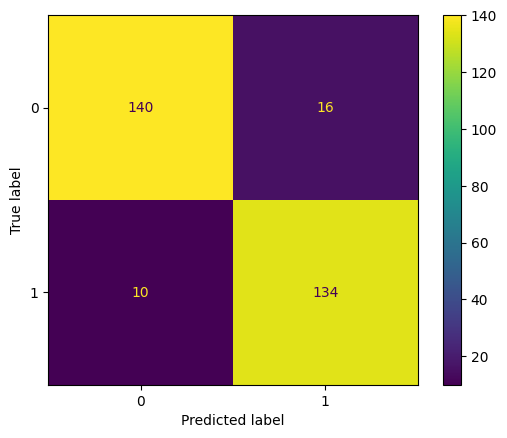

In [15]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [16]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
from sklearn.ensemble import StackingClassifier

estimators = [
    ('tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('logreg', LogisticRegression(max_iter=1000))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack.score(X_test, y_test))


Stacking Classifier Accuracy: 0.9433333333333334


In [17]:
# 37. Train a Random Forest Classifier and print the top 5 most important features.
import numpy as np
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

importances = model.feature_importances_
top_indices = np.argsort(importances)[-5:][::-1]
print("Top 5 Important Features:")
for idx in top_indices:
    print(f"Feature {idx} Importance: {importances[idx]:.4f}")


Top 5 Important Features:
Feature 1 Importance: 0.1532
Feature 0 Importance: 0.1415
Feature 17 Importance: 0.1111
Feature 12 Importance: 0.0624
Feature 19 Importance: 0.0622


In [18]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
from sklearn.metrics import precision_score, recall_score, f1_score

bag = BaggingClassifier(n_estimators=50, random_state=1)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.8807947019867549
Recall: 0.9236111111111112
F1-Score: 0.9016949152542373


In [19]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
for depth in [None, 5, 10, 15]:
    model = RandomForestClassifier(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"Max Depth = {depth}, Accuracy = {acc:.4f}")

Max Depth = None, Accuracy = 0.9167
Max Depth = 5, Accuracy = 0.8967
Max Depth = 10, Accuracy = 0.9133
Max Depth = 15, Accuracy = 0.9167


In [20]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=base, n_estimators=20, random_state=1)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Base Estimator: {type(base).__name__}, MSE = {mse:.4f}")


Base Estimator: DecisionTreeRegressor, MSE = 0.0862
Base Estimator: KNeighborsRegressor, MSE = 0.0680


In [21]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.9606481481481481


In [22]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(n_estimators=50, random_state=1)
scores = cross_val_score(bag, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.925 0.865 0.905 0.88  0.875]
Mean Accuracy: 0.89


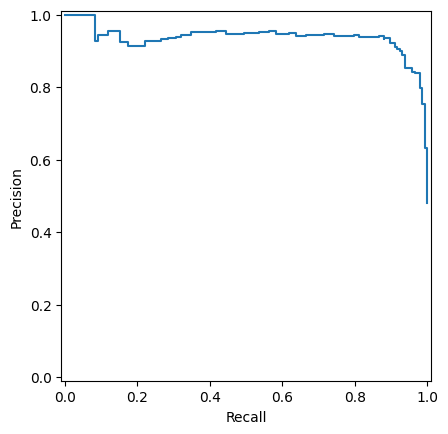

In [23]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, probs)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()


In [24]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
estimators = [
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('logreg', LogisticRegression(max_iter=1000))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
print("Stacking (RF + LogReg) Accuracy:", stack.score(X_test, y_test))


Stacking (RF + LogReg) Accuracy: 0.92


In [25]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
for max_samples in [0.5, 0.7, 1.0]:
    model = BaggingRegressor(n_estimators=30, max_samples=max_samples, random_state=1)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Bootstrap Sample = {max_samples}, MSE = {mse:.4f}")


Bootstrap Sample = 0.5, MSE = 0.0876
Bootstrap Sample = 0.7, MSE = 0.0877
Bootstrap Sample = 1.0, MSE = 0.0837
